In [1]:
# Standard Packages
import pandas as pd
import numpy as np

# Viz Packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Scipy Stats
import scipy.stats as stats 

# Statsmodel Api
import statsmodels.api as sm
from statsmodels.formula.api import ols

# SKLearn Modules
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Opening up our Kings County Housing Prices dataset
df = pd.read_csv('/Users/aheinke/Documents/Flatiron/NYC-DS-010923/Phase_2/Phase2_Final_Proj/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [3]:
# Taking a look at 
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [5]:
df['view']

0           NONE
1        AVERAGE
2        AVERAGE
3        AVERAGE
4           NONE
          ...   
30150       NONE
30151       FAIR
30152       NONE
30153       NONE
30154       NONE
Name: view, Length: 30155, dtype: object

In [6]:
df['address']

0        2102 Southeast 21st Court, Renton, Washington ...
1        11231 Greenwood Avenue North, Seattle, Washing...
2        8504 South 113th Street, Seattle, Washington 9...
3        4079 Letitia Avenue South, Seattle, Washington...
4        2193 Northwest Talus Drive, Issaquah, Washingt...
                               ...                        
30150    4673 Eastern Avenue North, Seattle, Washington...
30151    4131 44th Avenue Southwest, Seattle, Washingto...
30152    910 Martin Luther King Jr Way, Seattle, Washin...
30153    17127 114th Avenue Southeast, Renton, Washingt...
30154    18615 7th Avenue South, Burien, Washington 981...
Name: address, Length: 30155, dtype: object

In [7]:
df['address'][0]

'2102 Southeast 21st Court, Renton, Washington 98055, United States'

In [68]:
df['heat_source']

0                Gas
1                Oil
2                Gas
3                Gas
4        Electricity
            ...     
30150            Oil
30151            Gas
30152            Gas
30153            Gas
30154            Oil
Name: heat_source, Length: 30155, dtype: object

In [8]:
df['nuisance']

0         NO
1        YES
2         NO
3         NO
4        YES
        ... 
30150     NO
30151     NO
30152    YES
30153     NO
30154     NO
Name: nuisance, Length: 30155, dtype: object

In [9]:
df['grade']

0        7 Average
1        7 Average
2        7 Average
3         9 Better
4        7 Average
           ...    
30150       8 Good
30151    7 Average
30152    7 Average
30153       8 Good
30154    7 Average
Name: grade, Length: 30155, dtype: object

In [10]:
df['grade'].value_counts()

7 Average        11697
8 Good            9410
9 Better          3806
6 Low Average     2858
10 Very Good      1371
11 Excellent       406
5 Fair             393
12 Luxury          122
4 Low               51
13 Mansion          24
3 Poor              13
1 Cabin              2
2 Substandard        2
Name: grade, dtype: int64

In [11]:
df['price'].value_counts()

650000.0     346
750000.0     307
800000.0     299
850000.0     296
600000.0     295
            ... 
838355.0       1
903888.0       1
576200.0       1
1081500.0      1
720902.0       1
Name: price, Length: 5202, dtype: int64

In [12]:
schools_df = pd.read_csv('/Users/aheinke/Documents/Flatiron/NYC-DS-010923/Phase_2/Phase2_Final_Proj/Report_Card_Assessment_Data_2021-22_School_year.csv')
schools_df

,SchoolYear,OrganizationLevel,County,ESDName,ESDOrganizationId,DistrictCode,DistrictName,DistrictOrganizationId,SchoolCode,SchoolName,...,Count of students expected to test including previously passed,CountMetStandard,PercentMetStandard,PercentLevel1,PercentLevel2,PercentLevel3,PercentLevel4,PercentMetTestedOnly,PercentNoScore,DataAsOf
0,2021-22,District,Grays Harbor,Capital Region ESD 113,100004.0,14005.0,Aberdeen School District,100010.0,NaN,District Total,...,176.0,54.0,30.7%,0.460227,0.221591,0.198864,0.107955,0.310345,0.011364,9/7/2022
1,2021-22,District,Grays Harbor,Capital Region ESD 113,100004.0,14005.0,Aberdeen School District,100010.0,NaN,District Total,...,107.0,35.0,32.7%,0.420561,0.224299,0.196262,0.130841,0.336538,0.028037,9/7/2022
2,2021-22,District,Grays Harbor,Capital Region ESD 113,100004.0,14005.0,Aberdeen School District,100010.0,NaN,District Total,...,111.0,39.0,35.1%,0.441441,0.198198,0.198198,0.153153,0.354545,0.009009,9/7/2022
3,2021-22,District,Grays Harbor,Capital Region ESD 113,100004.0,14005.0,Aberdeen School District,100010.0,NaN,District Total,...,NaN,NaN,Suppressed: N<10,NaN,NaN,NaN,NaN,NaN,NaN,9/7/2022
4,2021-22,District,Grays Harbor,Capital Region ESD 113,100004.0,14005.0,Aberdeen School District,100010.0,NaN,District Total,...,NaN,NaN,Suppressed: N<10,NaN,NaN,NaN,NaN,NaN,NaN,9/7/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760171,2021-22,State,Multiple,State Total,NaN,NaN,State Total,NaN,NaN,State Total,...,25809.0,8952.0,34.7%,0.343795,0.234414,0.227944,0.118912,0.374953,0.074935,9/7/2022
760172,2021-22,State,Multiple,State Total,NaN,NaN,State Total,NaN,NaN,State Total,...,280558.0,161649.0,57.6%,0.173644,0.196114,0.305588,0.270571,0.609101,0.054083,9/7/2022
760173,2021-22,State,Multiple,State Total,NaN,NaN,State Total,NaN,NaN,State Total,...,289153.0,114128.0,39.5%,0.318903,0.228908,0.190969,0.203724,0.418771,0.057496,9/7/2022
760174,2021-22,State,Multiple,State Total,NaN,NaN,State Total,NaN,NaN,State Total,...,537988.0,203577.0,37.8%,0.328708,0.236754,0.189959,0.188442,0.400907,0.056137,9/7/2022


In [13]:
schools_df.describe()

,ESDOrganizationId,DistrictCode,DistrictOrganizationId,SchoolCode,SchoolOrganizationId,Count of Students Expected to Test,Count of students expected to test including previously passed,CountMetStandard,PercentLevel1,PercentLevel2,PercentLevel3,PercentLevel4,PercentMetTestedOnly,PercentNoScore
count,754163.000000,749376.000000,749376.000000,587239.000000,587239.000000,255154.000000,255154.000000,255154.000000,385285.000000,385285.000000,385285.000000,385285.000000,385285.000000,385285.000000
mean,100055.384047,22339.034248,100219.933789,3599.351349,102542.400409,399.483426,399.511232,178.480706,0.281602,0.231202,0.247096,0.181734,0.456136,0.058366
std,537.279292,10374.784782,603.587476,1097.526505,1672.995700,5756.888239,5757.043371,2680.040846,0.167085,0.092492,0.109450,0.146054,0.201013,0.110698
min,100001.000000,1109.000000,100001.000000,1502.000000,100326.000000,10.000000,10.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.011278,0.000000
25%,100003.000000,17001.000000,100084.000000,2756.000000,101338.000000,29.000000,29.000000,10.000000,0.151786,0.173913,0.166667,0.073171,0.300000,0.000000
50%,100006.000000,21401.000000,100159.000000,3471.000000,102241.000000,60.000000,60.000000,24.000000,0.262517,0.230769,0.239130,0.146853,0.444444,0.022504
75%,100007.000000,31201.000000,100231.000000,4392.000000,103074.000000,146.000000,146.000000,62.000000,0.393939,0.283391,0.316176,0.254658,0.600000,0.060293
max,105886.000000,39801.000000,106675.000000,5953.000000,106790.000000,564796.000000,564799.000000,285824.000000,0.938931,0.875000,0.866667,0.902655,1.000000,0.968481


In [14]:
schools_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760176 entries, 0 to 760175
Data columns (total 29 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   SchoolYear                                                      760176 non-null  object 
 1   OrganizationLevel                                               760176 non-null  object 
 2   County                                                          760176 non-null  object 
 3   ESDName                                                         755209 non-null  object 
 4   ESDOrganizationId                                               754163 non-null  float64
 5   DistrictCode                                                    749376 non-null  float64
 6   DistrictName                                                    760176 non-null  object 
 7   DistrictOrganizationId                

In [15]:
schools_df.duplicated().value_counts()

False    760176
dtype: int64

In [16]:
schools_df[['DistrictName','SchoolName','StudentGroup','GradeLevel','TestAdministration','TestSubject','PercentMetStandard']]

,DistrictName,SchoolName,StudentGroup,GradeLevel,TestAdministration,TestSubject,PercentMetStandard
0,Aberdeen School District,District Total,Low-Income,04,SBAC,ELA,30.7%
1,Aberdeen School District,District Total,Female,04,SBAC,ELA,32.7%
2,Aberdeen School District,District Total,Male,04,SBAC,ELA,35.1%
3,Aberdeen School District,District Total,Homeless,04,SBAC,ELA,Suppressed: N<10
4,Aberdeen School District,District Total,Migrant,04,SBAC,ELA,Suppressed: N<10
...,...,...,...,...,...,...,...
760171,State Total,State Total,Black/ African American,All Grades,SBAC,ELA,34.7%
760172,State Total,State Total,White,All Grades,SBAC,ELA,57.6%
760173,State Total,State Total,Male,All Grades,SBAC,Math,39.5%
760174,State Total,State Total,Non Section 504,All Grades,SBAC,Math,37.8%


In [17]:
king_school_df = schools_df[schools_df.County == "King"].copy()

In [18]:
king_school_df['DistrictName'].value_counts()

Seattle School District No. 1              27136
Lake Washington School District            14470
Kent School District                       12693
Federal Way School District                12013
Highline School District                    9768
Northshore School District                  9572
Renton School District                      9106
Bellevue School District                    8219
Auburn School District                      8216
Issaquah School District                    7862
Shoreline School District                   5097
Snoqualmie Valley School District           4148
Tahoma School District                      3478
Enumclaw School District                    3264
Tukwila School District                     2342
Riverview School District                   2162
Mercer Island School District               1849
Vashon Island School District               1528
Rainier Prep Charter School District         698
Summit Public School: Atlas                  592
Skykomish School Dis

In [19]:
#Let's create a subset for our housing data to fit the criteria for our stakeholders
kc_family_house_df = df[(df['bedrooms'] >= 4) & (df['nuisance'] == "NO")]
#Reset the index
kc_family_house_df.reset_index(drop=True,inplace= True)
#Preview first 5 rows of subset
kc_family_house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.190520
1,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.225200
2,2944500680,3/17/2022,780000.0,4,2.5,2340,8125,2.0,NO,NO,...,PUBLIC,2340,0,440,70,1989,0,"2721 Southwest 343rd Place, Federal Way, Washi...",47.293770,-122.369320
3,2619950340,6/21/2021,975000.0,4,2.5,2980,5859,2.0,NO,NO,...,PUBLIC,2980,0,540,170,2011,0,"27950 Northeast 147th Circle, Duvall, Washingt...",47.733170,-121.965305
4,2873000690,6/11/2021,680000.0,4,3.0,2130,7649,1.0,NO,NO,...,PUBLIC,1130,1100,440,280,1975,0,"20432 130th Place Southeast, Kent, Washington ...",47.418155,-122.166960


In [20]:
kc_family_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             11054 non-null  int64  
 1   date           11054 non-null  object 
 2   price          11054 non-null  float64
 3   bedrooms       11054 non-null  int64  
 4   bathrooms      11054 non-null  float64
 5   sqft_living    11054 non-null  int64  
 6   sqft_lot       11054 non-null  int64  
 7   floors         11054 non-null  float64
 8   waterfront     11054 non-null  object 
 9   greenbelt      11054 non-null  object 
 10  nuisance       11054 non-null  object 
 11  view           11054 non-null  object 
 12  condition      11054 non-null  object 
 13  grade          11054 non-null  object 
 14  heat_source    11053 non-null  object 
 15  sewer_system   11047 non-null  object 
 16  sqft_above     11054 non-null  int64  
 17  sqft_basement  11054 non-null  int64  
 18  sqft_g

In [21]:
kc_family_house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,1.105400e+04,1.105400e+04,11054.000000,11054.000000,11054.000000,1.105400e+04,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000
mean,4.588934e+09,1.371442e+06,4.313280,2.827755,2757.591279,1.732516e+04,1.661706,2349.729962,567.531663,445.106477,260.396689,1982.609915,85.799168,47.481833,-121.930794
std,2.896914e+09,1.057857e+06,0.608759,0.837062,962.015735,5.016448e+04,0.492704,949.663211,669.141408,284.598893,267.207757,30.015171,405.388921,0.697157,2.931898
min,1.000094e+06,3.744000e+04,4.000000,0.000000,3.000000,6.740000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,25.914681,-122.520040
25%,2.024064e+09,7.600000e+05,4.000000,2.500000,2100.000000,5.706000e+03,1.000000,1600.000000,0.000000,310.000000,70.000000,1963.000000,0.000000,47.389735,-122.296830
50%,3.913700e+09,1.100000e+06,4.000000,2.500000,2600.000000,7.899000e+03,2.000000,2250.000000,0.000000,468.000000,194.500000,1988.000000,0.000000,47.546028,-122.190580
75%,7.334625e+09,1.669750e+06,5.000000,3.000000,3210.000000,1.133100e+04,2.000000,2930.000000,1110.000000,620.000000,360.000000,2006.000000,0.000000,47.661055,-122.088734
max,9.904000e+09,2.350000e+07,13.000000,10.500000,15360.000000,1.722798e+06,4.000000,12660.000000,8020.000000,3390.000000,4370.000000,2022.000000,2022.000000,48.194960,-73.776134


In [22]:
kc_family_house_df.duplicated().value_counts()

False    11054
dtype: int64

In [23]:
# Dropping any rows with null values, since there is not that many, so it shouldn't really affect the 
# success of our dataset.
kc_family_house_df.dropna(inplace=True)

In [24]:
# As well, dropping the 'nuisance' column, since this dataset was filtered to only inlcude rows that
# returned a value of "NO" in our 'nuisance' column.
kc_family_house_df.drop(columns = ['nuisance'], inplace=True)

In [25]:
kc_family_house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.190520
1,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.225200
2,2944500680,3/17/2022,780000.0,4,2.5,2340,8125,2.0,NO,NO,...,PUBLIC,2340,0,440,70,1989,0,"2721 Southwest 343rd Place, Federal Way, Washi...",47.293770,-122.369320
3,2619950340,6/21/2021,975000.0,4,2.5,2980,5859,2.0,NO,NO,...,PUBLIC,2980,0,540,170,2011,0,"27950 Northeast 147th Circle, Duvall, Washingt...",47.733170,-121.965305
4,2873000690,6/11/2021,680000.0,4,3.0,2130,7649,1.0,NO,NO,...,PUBLIC,1130,1100,440,280,1975,0,"20432 130th Place Southeast, Kent, Washington ...",47.418155,-122.166960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,6743700362,6/17/2021,2080000.0,4,2.5,3280,7200,2.0,NO,NO,...,PUBLIC,3280,0,570,140,2010,0,"12716 Northeast 106th Lane, Kirkland, Washingt...",47.695630,-122.171095
11050,8081900170,3/29/2022,2650000.0,4,3.5,3270,9200,2.0,NO,NO,...,PUBLIC,2410,1060,0,40,1925,0,"3303 Northwest 72nd Street, Seattle, Washingto...",47.680710,-122.400025
11051,2539500005,12/14/2021,880000.0,4,2.5,2260,5661,1.0,NO,NO,...,PUBLIC,1310,1300,460,230,2000,0,"2830 South Bradford Place, Seattle, Washington...",47.568800,-122.295505
11052,6142050730,6/3/2022,1325000.0,5,3.5,3100,6428,2.0,NO,NO,...,PUBLIC,3100,0,710,110,2018,0,"28910 Northeast 156th Street, Duvall, Washingt...",47.740145,-121.952390


## Pulling in our new CSV for modeling

In [26]:
final_kc_df = pd.read_csv('/Users/aheinke/Documents/Flatiron/NYC-DS-010923/Phase_2/Phase2_Final_Proj/final_kc.csv')
final_kc_df

,Unnamed: 0,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,address,lat,long,Zip Code,DistrictName,ELA,Math,Science,District Test Score,zipcodes
0,0,0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,...,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.190520,98055,Renton School District,42.9,32.5,33.3,36.23,"['98006', '98031', '98032', '98055', '98056', ..."
1,1,11,2873000690,6/11/2021,680000.0,4,3.0,2130,7649,1.0,...,"20432 130th Place Southeast, Kent, Washington ...",47.418155,-122.166960,98031,Renton School District,42.9,32.5,33.3,36.23,"['98006', '98031', '98032', '98055', '98056', ..."
2,2,22,7231501575,12/28/2021,450000.0,2,1.0,900,6000,1.0,...,"533 Wells Avenue South, Renton, Washington 980...",47.475360,-122.205730,98057,Renton School District,42.9,32.5,33.3,36.23,"['98006', '98031', '98032', '98055', '98056', ..."
3,3,25,2095600170,10/8/2021,580000.0,3,3.0,2020,4482,1.0,...,"22609 102nd Place Southeast, Kent, Washington ...",47.399470,-122.204130,98031,Renton School District,42.9,32.5,33.3,36.23,"['98006', '98031', '98032', '98055', '98056', ..."
4,4,30,9320600110,8/18/2021,500000.0,3,1.5,1140,9690,1.0,...,"9812 South 212th Street, Kent, Washington 9803...",47.411835,-122.209540,98031,Renton School District,42.9,32.5,33.3,36.23,"['98006', '98031', '98032', '98055', '98056', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166,29166,29809,723039050,12/16/2021,1826000.0,2,3.0,2070,71264,2.0,...,"10717 Southwest Biloxi Road, Vashon, Washingto...",47.504070,-122.471550,98070,Vashon Island School District,62.3,51.3,67.0,60.20,['98070']
29167,29167,29842,2022039037,4/14/2022,256000.0,2,1.0,1330,113815,1.0,...,"9632 Southwest Bayview Drive, Vashon, Washingt...",47.387960,-122.456440,98070,Vashon Island School District,62.3,51.3,67.0,60.20,['98070']
29168,29168,29913,2322039033,7/14/2021,950000.0,2,2.5,1960,11406,2.0,...,"4510 Southwest 244th Street, Vashon, Washingto...",47.386190,-122.387935,98070,Vashon Island School District,62.3,51.3,67.0,60.20,['98070']
29169,29169,29985,3023039221,9/21/2021,450000.0,2,2.0,840,138520,1.0,...,"16097 109th Avenue Southwest, Vashon, Washingt...",47.458555,-122.475450,98070,Vashon Island School District,62.3,51.3,67.0,60.20,['98070']


In [27]:
final_kc_df.describe()

,Unnamed: 0,index,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,...,sqft_patio,yr_built,yr_renovated,lat,long,Zip Code,ELA,Math,Science,District Test Score
count,29171.000000,29171.000000,2.917100e+04,2.917100e+04,29171.000000,29171.000000,29171.000000,2.917100e+04,29171.000000,29171.000000,...,29171.000000,29171.000000,29171.000000,29171.000000,29171.000000,29171.000000,29171.000000,29171.000000,28686.000000,29171.000000
mean,14585.000000,15071.154229,4.537088e+09,1.112953e+06,3.436838,2.332796,2131.456584,1.712596e+04,1.516523,1826.246272,...,216.348428,1973.839532,93.718453,47.543098,-122.214529,98077.450002,60.028875,48.001495,49.676884,52.558531
std,8421.086688,8714.307412,2.881740e+09,8.956153e+05,0.976698,0.894518,976.627817,6.082946e+04,0.548287,880.084663,...,246.760414,31.658679,422.526063,0.146121,0.142887,54.641371,14.311060,16.123096,13.162652,14.253053
min,0.000000,0.000000,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,...,0.000000,1900.000000,0.000000,47.159700,-122.526650,98001.000000,29.600000,16.700000,26.100000,24.130000
25%,7292.500000,7510.500000,2.092350e+09,6.450000e+05,3.000000,2.000000,1440.000000,5.000000e+03,1.000000,1190.000000,...,40.000000,1952.000000,0.000000,47.430165,-122.328415,98032.000000,56.700000,32.500000,39.000000,47.600000
50%,14585.000000,15069.000000,3.874900e+09,8.680000e+05,3.000000,2.500000,1940.000000,7.560000e+03,1.500000,1580.000000,...,140.000000,1976.000000,0.000000,47.557660,-122.234360,98059.000000,62.700000,51.600000,49.800000,54.270000
75%,21877.500000,22631.500000,7.287100e+09,1.310000e+06,4.000000,3.000000,2640.000000,1.076900e+04,2.000000,2290.000000,...,310.000000,2001.000000,0.000000,47.671930,-122.127775,98117.000000,69.200000,59.000000,60.100000,62.770000
max,29170.000000,30154.000000,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,...,4370.000000,2022.000000,2022.000000,47.789830,-121.163960,98354.000000,82.000000,76.900000,75.900000,78.270000


In [28]:
final_kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29171 entries, 0 to 29170
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           29171 non-null  int64  
 1   index                29171 non-null  int64  
 2   id                   29171 non-null  int64  
 3   date                 29171 non-null  object 
 4   price                29171 non-null  float64
 5   bedrooms             29171 non-null  int64  
 6   bathrooms            29171 non-null  float64
 7   sqft_living          29171 non-null  int64  
 8   sqft_lot             29171 non-null  int64  
 9   floors               29171 non-null  float64
 10  waterfront           29171 non-null  object 
 11  greenbelt            29171 non-null  object 
 12  nuisance             29171 non-null  object 
 13  view                 29171 non-null  object 
 14  condition            29171 non-null  object 
 15  grade                29171 non-null 

In [29]:
final_kc_df = final_kc_df.drop(['Unnamed: 0', 'index', 'id', 'date', 'address', 'lat', 'long','zipcodes',\
                                'sqft_above', 'waterfront', 'greenbelt', 'yr_renovated', 'Science'], axis = 1)


In [30]:
#date, waterfront, greenbelt, view, condition, grade, heat_source, sewer_system, address, DistrictName, ELA, Math, Science, zipcodes


In [31]:
final_kc_df.corr()['price']

price                  1.000000
bedrooms               0.290869
bathrooms              0.487859
sqft_living            0.616616
sqft_lot               0.086794
floors                 0.199855
sqft_basement          0.246263
sqft_garage            0.267164
sqft_patio             0.317637
yr_built               0.105854
Zip Code              -0.105857
ELA                    0.384725
Math                   0.407748
District Test Score    0.401979
Name: price, dtype: float64

In [32]:
final_kc_df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,sqft_garage,sqft_patio,yr_built,Zip Code,ELA,Math,District Test Score
price,1.000000,0.290869,0.487859,0.616616,0.086794,0.199855,0.246263,0.267164,0.317637,0.105854,-0.105857,0.384725,0.407748,0.401979
bedrooms,0.290869,1.000000,0.593532,0.630774,0.000211,0.195761,0.234842,0.304934,0.192096,0.182995,-0.162116,0.131940,0.129156,0.138010
bathrooms,0.487859,0.593532,1.000000,0.779773,0.038860,0.427802,0.260517,0.461175,0.333530,0.455844,-0.178667,0.224774,0.214542,0.226680
sqft_living,0.616616,0.630774,0.779773,1.000000,0.118709,0.355945,0.335824,0.503417,0.405932,0.328665,-0.193286,0.261357,0.245284,0.265250
sqft_lot,0.086794,0.000211,0.038860,0.118709,1.000000,-0.020461,0.002427,0.084871,0.157318,0.012565,-0.096435,0.044233,0.008262,0.035717
floors,0.199855,0.195761,0.427802,0.355945,-0.020461,1.000000,-0.243608,0.179844,0.123584,0.520807,-0.034457,0.126158,0.102930,0.109810
sqft_basement,0.246263,0.234842,0.260517,0.335824,0.002427,-0.243608,1.000000,0.016861,0.214402,-0.227508,0.160726,0.034397,0.077352,0.046373
sqft_garage,0.267164,0.304934,0.461175,0.503417,0.084871,0.179844,0.016861,1.000000,0.228043,0.497074,-0.361893,0.199142,0.166547,0.201616
sqft_patio,0.317637,0.192096,0.333530,0.405932,0.157318,0.123584,0.214402,0.228043,1.000000,0.136006,-0.105866,0.127191,0.118519,0.130863
yr_built,0.105854,0.182995,0.455844,0.328665,0.012565,0.520807,-0.227508,0.497074,0.136006,1.000000,-0.299415,0.129211,0.078468,0.118390


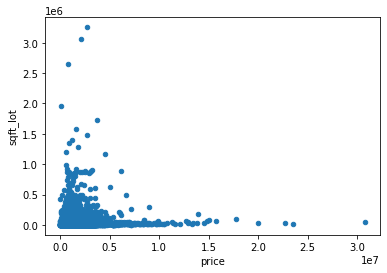

In [33]:
final_kc_df.plot(x='price', y='sqft_lot', kind='scatter');

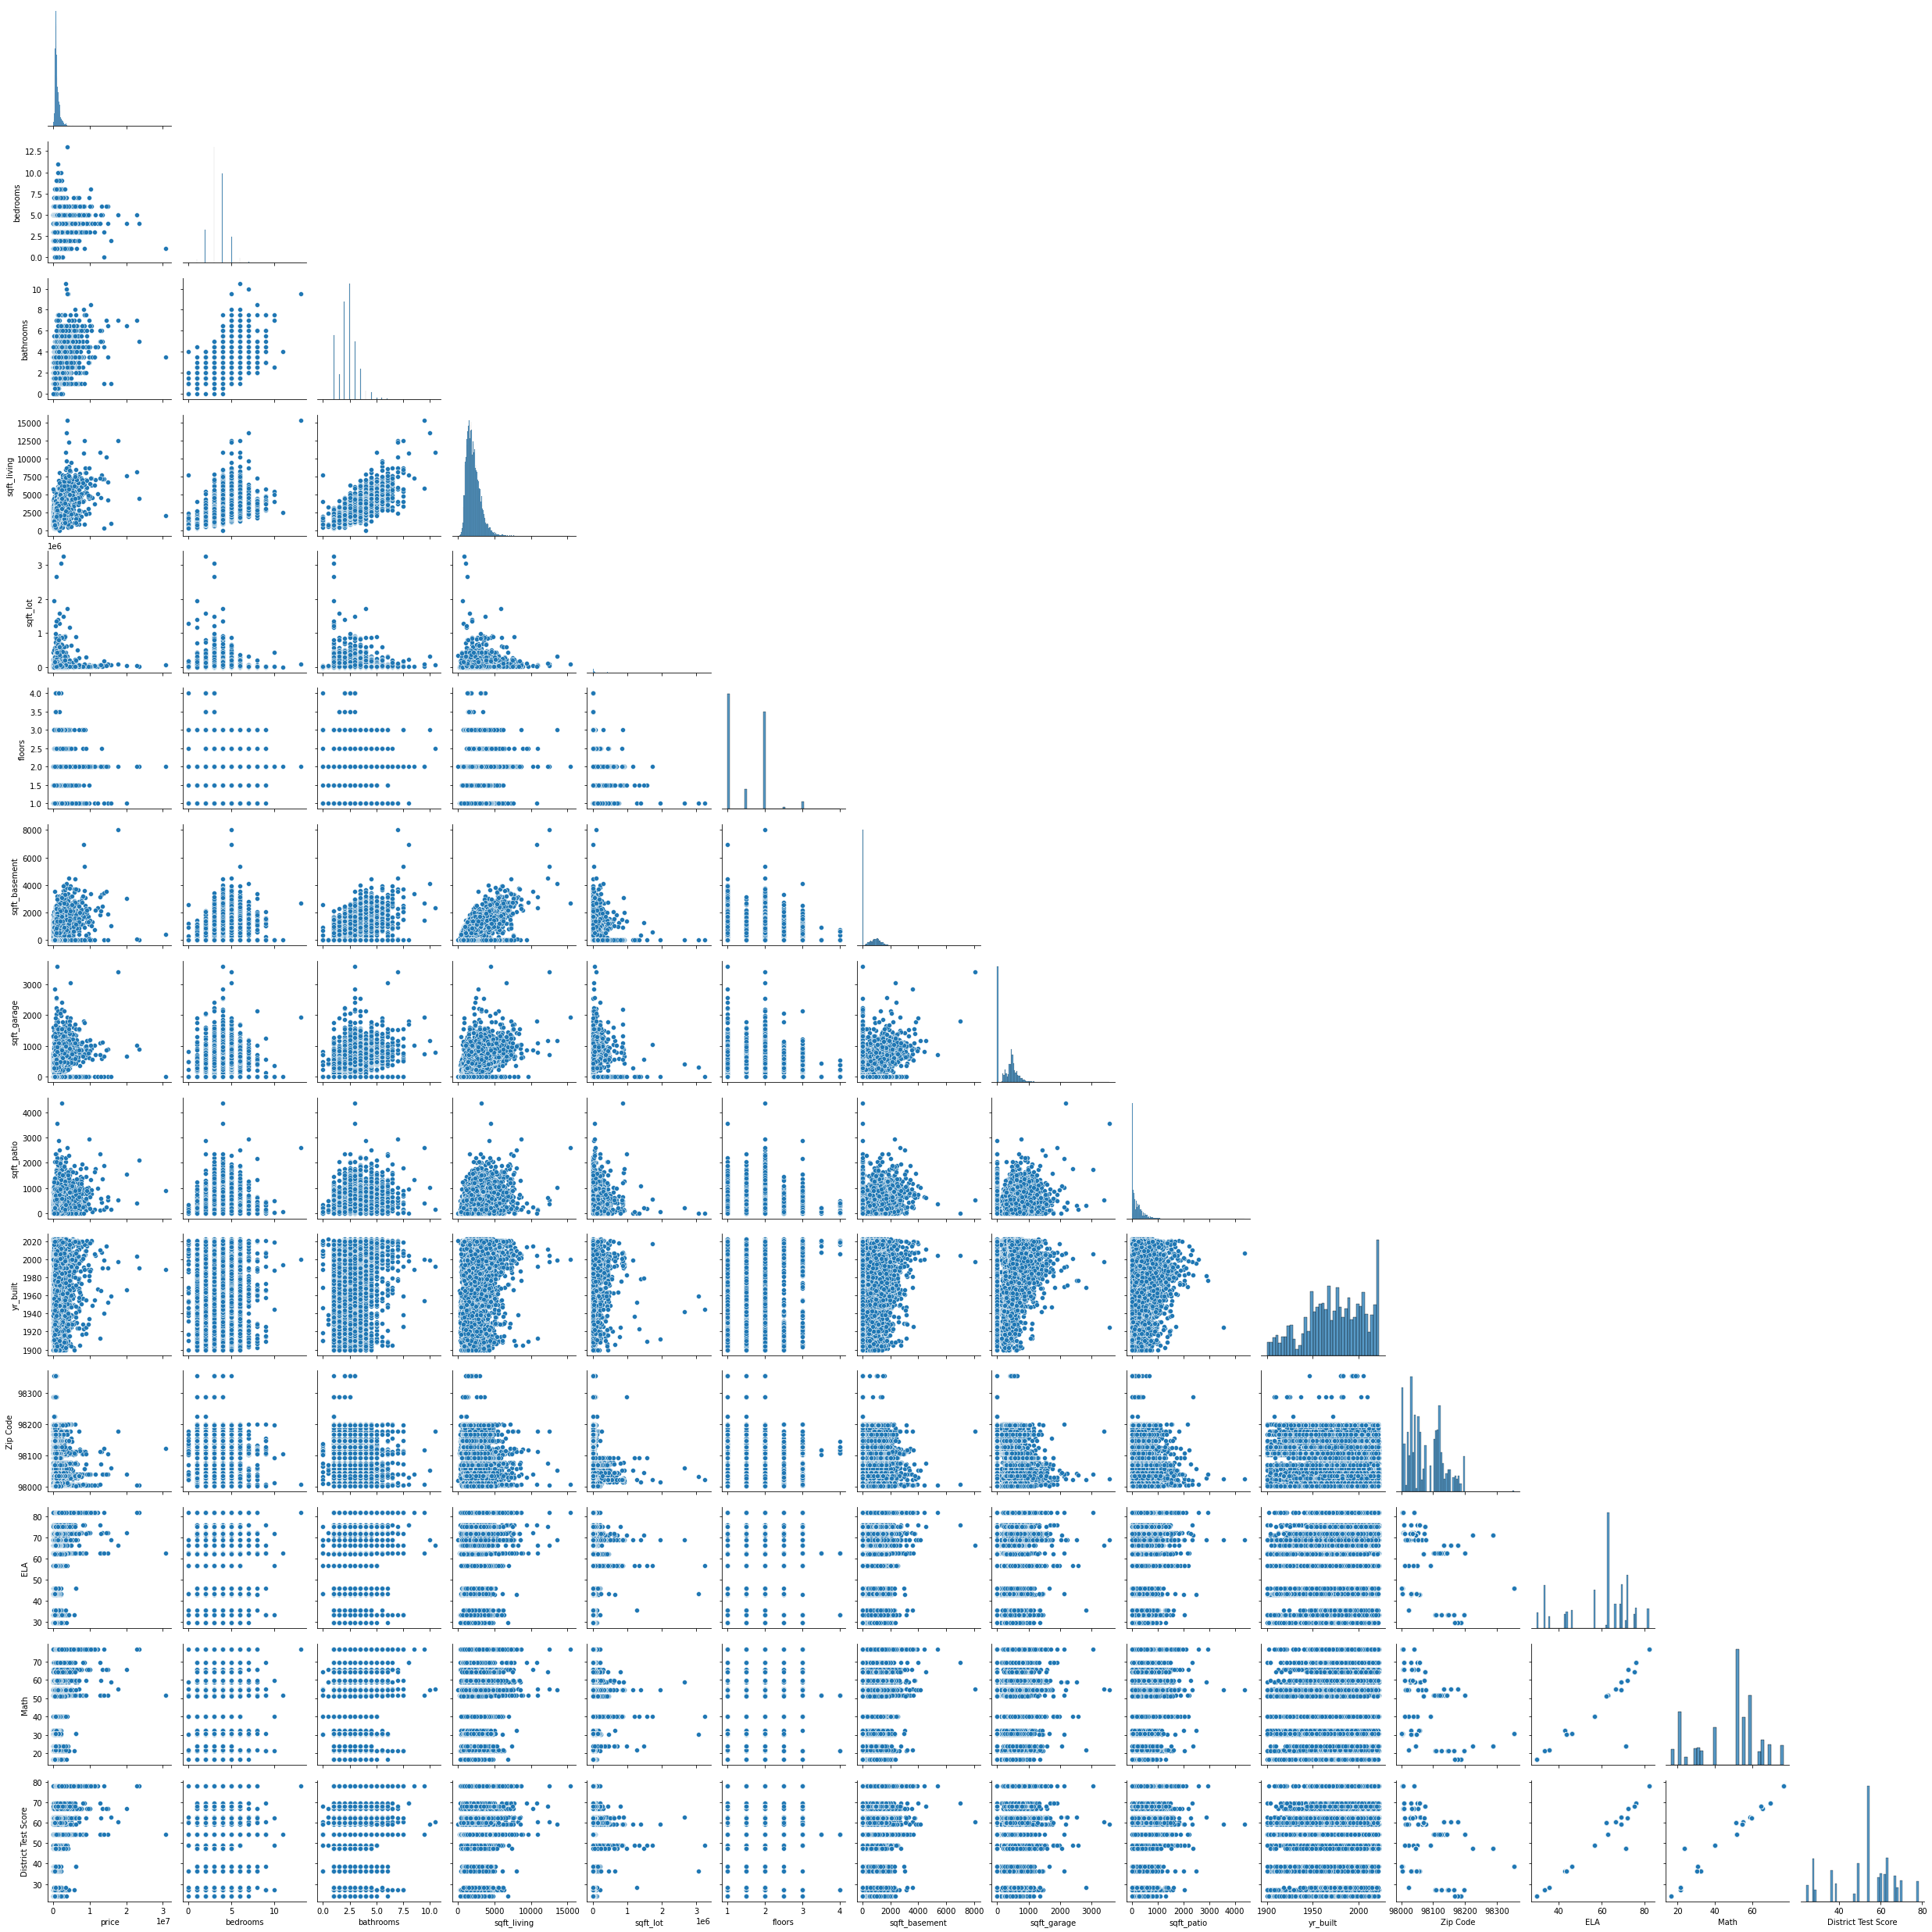

In [34]:
sns.pairplot(final_kc_df , corner = True)

<AxesSubplot:>

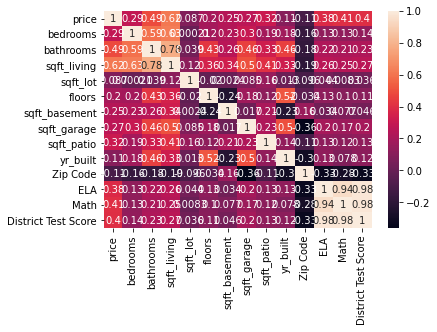

In [35]:
sns.heatmap(final_kc_df.corr(), annot = True)

### Baseline Model....s

In [36]:
# Using price and sq ft of the living space, as it was the closest correlated numerical value
y = final_kc_df['price']
X_baseline = final_kc_df[['sqft_living']]

In [37]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                 1.789e+04
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:26:28   Log-Likelihood:            -4.3421e+05
No. Observations:               29171   AIC:                         8.684e+05
Df Residuals:                   29169   BIC:                         8.684e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.231e+04   9910.833     -9.315      

In [38]:
# Transformed DistrictName to a numerical data so that we could comoare the correlation to price
y = final_kc_df['price']
X = pd.get_dummies(final_kc_df['DistrictName'], drop_first = True)

In [39]:
baseline_model2 = sm.OLS(y, sm.add_constant(X))
baseline_results2 = baseline_model2.fit()

print(baseline_results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     651.6
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:26:28   Log-Likelihood:            -4.3649e+05
No. Observations:               29171   AIC:                         8.730e+05
Df Residuals:                   29153   BIC:                         8.732e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [40]:
# That didn't go well, so now we're going to try condition
y = final_kc_df['price']
X_cond = final_kc_df[['District Test Score']]

In [41]:
baseline_model3 = sm.OLS(y, sm.add_constant(X_cond))
baseline_results3 = baseline_model3.fit()

print(baseline_results3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     5622.
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:26:28   Log-Likelihood:            -4.3862e+05
No. Observations:               29171   AIC:                         8.772e+05
Df Residuals:                   29169   BIC:                         8.773e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.146e+05   1

In [42]:
y = final_kc_df['price']
X_baseline2 = final_kc_df[['sqft_living', 'bathrooms']]

In [43]:
baseline_model4 = sm.OLS(y, sm.add_constant(X_baseline2))
baseline_results4 = baseline_model4.fit()

print(baseline_results4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     8952.
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:26:28   Log-Likelihood:            -4.3421e+05
No. Observations:               29171   AIC:                         8.684e+05
Df Residuals:                   29168   BIC:                         8.684e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.069e+05   1.16e+04     -9.237      

In [44]:
final_kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29171 entries, 0 to 29170
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                29171 non-null  float64
 1   bedrooms             29171 non-null  int64  
 2   bathrooms            29171 non-null  float64
 3   sqft_living          29171 non-null  int64  
 4   sqft_lot             29171 non-null  int64  
 5   floors               29171 non-null  float64
 6   nuisance             29171 non-null  object 
 7   view                 29171 non-null  object 
 8   condition            29171 non-null  object 
 9   grade                29171 non-null  object 
 10  heat_source          29171 non-null  object 
 11  sewer_system         29171 non-null  object 
 12  sqft_basement        29171 non-null  int64  
 13  sqft_garage          29171 non-null  int64  
 14  sqft_patio           29171 non-null  int64  
 15  yr_built             29171 non-null 

In [45]:
#onehot_enc = OneHotEncoder(drop = 'first', sparse = False)

#nominal_cols = ['Zip Code', 'DistrictName']
#onehot_enc.fit_transform(X_train[nominal_cols])

#X_train_nom_trans = onehot_enc.fit_transform(X_train[nominal_cols])
#X_train_nom_trans.shape

#cols = onehot_enc.get_feature_names()

#X_train_nom = pd.DataFrame(X_train_nom_trans, columns = cols)
#X_train_nom.head()

#X_process_train = pd.concat([X_train_numeric, X_train_cat],axis = 1)

### EDA - visualizations, mapping out distributions of individual variable, VIF, correlations

In [46]:
# X = final_kc_df('price', axis = 1)
# # For each X, calculate VIF and save in dataframe
# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# vif["features"] = X.columns
# vif.sort_values('VIF Factor', ascending=False)

### Modeling
Prepare Data

In [47]:
from sklearn.linear_model import LinearRegression

# Prepare data
X = final_kc_df.drop('price', axis=1)
y = final_kc_df['price']

### TRAIN/TEST SPLIT

In [48]:
#X = final_kc_df.drop(columns='price')
#y = final_kc_df['price']
#X_train, X_test, y_train, y_test = train_test_split(
 #   X, y, test_size=0.3, random_state=42)

In [49]:
from sklearn.model_selection import train_test_split

# Test/Train Split - Train 80% of Data, Test 20% of Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Processing Data
Y target variable

In [50]:
#Train Data
y_train.shape

(23336,)

In [51]:
#Test Data
y_test.shape

(5835,)

In [52]:
#  0   price                7545 non-null   float64
#  1   bedrooms             7545 non-null   int64  
#  2   bathrooms            7545 non-null   float64
#  3   sqft_living          7545 non-null   int64  
#  4   sqft_lot             7545 non-null   int64  
#  5   floors               7545 non-null   float64
#  6   condition            7545 non-null   object 
#  7   grade                7545 non-null   object 
#  8   heat_source          7545 non-null   object 
#  9   sewer_system         7545 non-null   object 
#  10  sqft_basement        7545 non-null   int64  
#  11  sqft_garage          7545 non-null   int64  
#  12  sqft_patio           7545 non-null   int64  
#  13  Zip Code             7545 non-null   int64  
#  14  DistrictName         7545 non-null   object 
#  15  ELA                  7545 non-null   float64
#  16  Math                 7545 non-null   float64
#  17  District Test Score  7545 non-null   float64

### Separate Continuous X Predictive Variables

In [53]:
X_train_numeric = X_train[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_basement',\
                           'sqft_garage','sqft_patio','ELA','Math','Zip Code','District Test Score']]

In [54]:
#View Correlation between Independent Numeric Variables
X_train_numeric.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,sqft_garage,sqft_patio,ELA,Math,Zip Code,District Test Score
bedrooms,1.000000,0.592982,0.636945,-0.001679,0.193921,0.239439,0.306055,0.194604,0.133511,0.131035,-0.160863,0.139570
bathrooms,0.592982,1.000000,0.780150,0.040826,0.429420,0.263482,0.460655,0.333332,0.223574,0.213246,-0.176279,0.225269
sqft_living,0.636945,0.780150,1.000000,0.121821,0.356021,0.335551,0.504983,0.404422,0.261937,0.246240,-0.193462,0.265761
sqft_lot,-0.001679,0.040826,0.121821,1.000000,-0.021275,-0.000465,0.092211,0.161519,0.048849,0.012596,-0.102327,0.040447
floors,0.193921,0.429420,0.356021,-0.021275,1.000000,-0.240184,0.179701,0.124448,0.125537,0.102862,-0.037590,0.109355
sqft_basement,0.239439,0.263482,0.335551,-0.000465,-0.240184,1.000000,0.015303,0.212245,0.034354,0.078852,0.165875,0.046735
sqft_garage,0.306055,0.460655,0.504983,0.092211,0.179701,0.015303,1.000000,0.229210,0.196897,0.164113,-0.363107,0.199270
sqft_patio,0.194604,0.333332,0.404422,0.161519,0.124448,0.212245,0.229210,1.000000,0.128419,0.120195,-0.107332,0.132194
ELA,0.133511,0.223574,0.261937,0.048849,0.125537,0.034354,0.196897,0.128419,1.000000,0.943067,-0.323141,0.983200
Math,0.131035,0.213246,0.246240,0.012596,0.102862,0.078852,0.164113,0.120195,0.943067,1.000000,-0.279166,0.982129


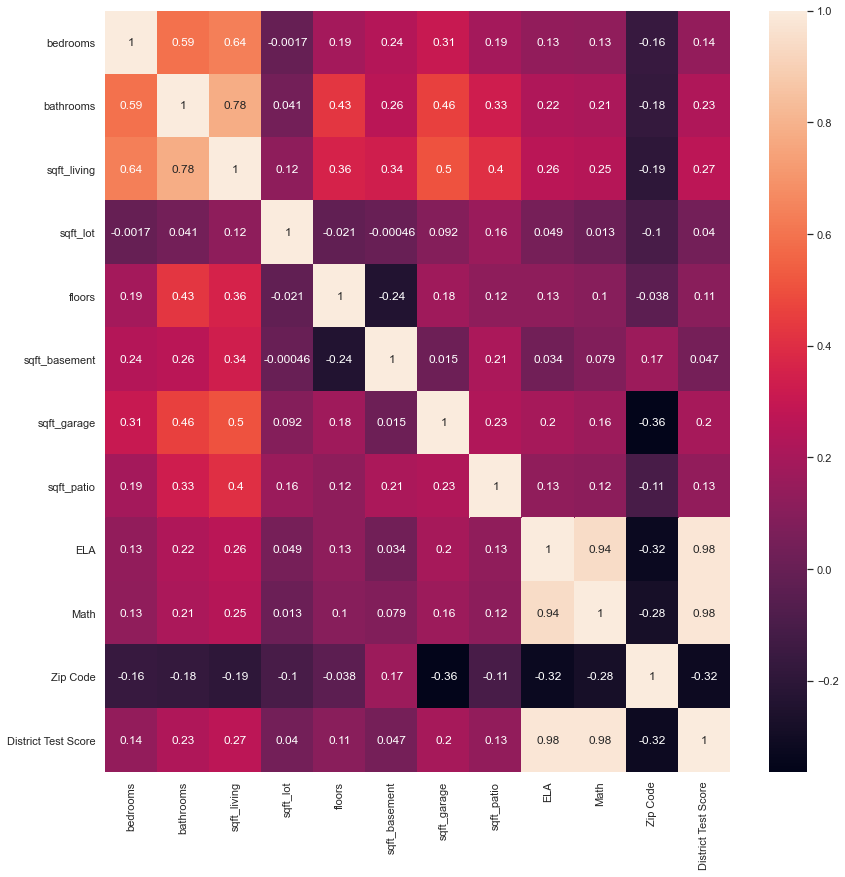

In [55]:
#Heatmap for Collinearity
sns.set(rc={'figure.figsize':(14, 14)})
sns.heatmap(X_train_numeric.corr(),annot=True);

#### TEST

In [56]:
X_test_numeric = X_test[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_basement',\
                           'sqft_garage','sqft_patio','ELA','Math','Zip Code','District Test Score']]

### Discrete X Predictive Variables
### TRAIN
Process Ordinal, Fit and transform, get names out into df

In [66]:
from sklearn.preprocessing import OrdinalEncoder

TypeError: __init__() got an unexpected keyword argument 'sparse'

In [58]:
ord_cat_selector = ['condition', 'grade', 'view']
X_train_ord_cat_subset = X_train[ord_cat_selector]

In [59]:
X_train_ord_cat_subset['condition'].unique()

array(['Good', 'Average', 'Very Good', 'Poor', 'Fair'], dtype=object)

In [60]:
X_train_ord_cat_subset['grade'].unique()

array(['9 Better', '7 Average', '8 Good', '6 Low Average', '11 Excellent',
       '10 Very Good', '5 Fair', '4 Low', '3 Poor', '12 Luxury',
       '13 Mansion', '2 Substandard'], dtype=object)

In [61]:
#X_train_ord_cat_subset['heat_source'].unique()

In [62]:
#X_train_ord_cat_subset['sewer_system'].unique()

In [63]:
#X_train_ord_cat_subset['DistrictName'].unique()

In [64]:
# REPLACE WITH COLUMN'S UNIQUE VALUES IN ASCENDING ORDER --->
condition_list = ['Poor', 'Fair', 'Average', 'Good', 'Very Good'] 
grade_list = ['3 Poor', '5 Fair', '6 Low Average', '7 Average','8 Good','9 Better','10 Very Good','11 Excellent',\
             '12 Luxury','13 Mansion']

In [65]:
o_enc = OrdinalEncoder(categories = [condition_list, grade_list])
o_enc.fit(X_train_ord_cat_subset)

ValueError: Shape mismatch: if categories is an array, it has to be of shape (n_features,).

In [ ]:
o_enc.transform(X_train_ord_cat_subset)

In [ ]:
X_train_ord = pd.DataFrame(o_enc.transform(X_train_ord_cat_subset),
                        columns = X_train_ord_cat_subset.columns)

In [ ]:
X_train_ord.head()

#### TEST

In [ ]:
X_test_ord_cat_subset = X_test[ord_cat_selector]

In [ ]:
X_test_ord = pd.DataFrame(o_enc.transform(X_test_ord_cat_subset),
                        columns = X_test_ord_cat_subset.columns)

### Discrete Nominal X Predictive Variables
### TRAIN
Process Nominal, Fit and transform, get names out into df

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehot_enc = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

In [ ]:
nominal_cols = ['heat_source', 'sewer_system', 'DistrictName']
onehot_enc.fit_transform(X_train[nominal_cols])

In [ ]:
X_train_nom_trans = onehot_enc.fit_transform(X_train[nominal_cols])
X_train_nom_trans.shape

In [ ]:
cols = onehot_enc.get_feature_names()

In [ ]:
X_train_nom = pd.DataFrame(X_train_nom_trans, columns = cols)
X_train_nom.head()

#### TEST

In [ ]:
onehot_enc.transform(X_test[nominal_cols])
X_test_nom_trans = onehot_enc.transform(X_test[nominal_cols])
X_test_nom_trans.shape

In [ ]:
X_test_nom = pd.DataFrame(X_test_nom_trans, columns = cols)

### Combine Discrete/Categorical X/ Predictive Variables

In [ ]:
#combine all catergorical variables

X_train_cat_df = pd.concat([X_train_ord,X_train_nom],axis = 1)
X_train_cat_df

#### TEST

In [ ]:
X_test_cat_df = pd.concat([X_test_ord,X_test_nom],axis = 1)

### Combine Continuous and Discrete X/ Predictive Variables

In [ ]:
#Train Data - Combine all processed X Variables
X_process_train = pd.concat([X_train_numeric.reset_index(),X_train_cat_df],axis = 1)

In [ ]:
X_process_train.head()

In [ ]:
X_process_train.shape

In [ ]:
X_process_train.isnull().sum()

#### TEST 

In [ ]:
X_process_test = pd.concat([X_test_numeric.reset_index(),X_test_cat_df],axis = 1)

#### Scale the Data

In [ ]:
# Let's create (instantiate) a StandardScaler object to scale our data for us.
from sklearn.preprocessing import StandardScaler

In [ ]:
# Now we'll apply it to our data by using the .fit() (calculates stds and means) and .transform() methods.
ss = StandardScaler()
#Train Data
ss.fit(X_process_train)
X_standard_process_train = ss.transform(X_process_train)

#Test Data
#X_standard_process_test = ss.transform(X_process_test)

In [ ]:
pd.DataFrame(X_standard_process_train, columns = X_process_train.columns).isna().sum()

#### Creating, Fitting, and Running the Model

In [ ]:
# Instantiate model
lr_simple_model = LinearRegression()

# Fit model
result = lr_simple_model.fit(X_standard_process_train, y_train)

In [ ]:
# Retrieve estimated slope coefficient
result.coef_

In [ ]:
# Retrieve estimated y-intercept coefficient
result.intercept_

In [ ]:
#GIVES US OUR R**2
lr_simple_model.score(X_standard_process_train, y_train)

#### TEST

In [ ]:
X_standard_process_test = ss.transform(X_process_test)

In [ ]:
lr_simple_model.score(X_standard_process_test, y_test)

In [ ]:
#These are our predictions - USE TEST DATA
y_hat = lr_simple_model.predict(X_standard_process_test)
y_hat

In [ ]:
print("Final Model Train:" , lr_simple_model.score(X_standard_process_train, y_train))
print("Final Model Test:" , lr_simple_model.score(X_standard_process_test, y_test))

#### Evaluate Final Model Performance
Observing Residuals

In [ ]:
y_hat = lr_simple_model.predict(X_standard_process_test)
resid = (y_train - y_hat)

fig, ax = plt.subplots()
ax.scatter(x=range(y_hat.shape[0]),y=resid, alpha=0.1);

    ### Toying with another csv we made...

In [ ]:
final_house_df = pd.read_csv('/Users/aheinke/Documents/Flatiron/NYC-DS-010923/Phase_2/Phase2_Final_Proj/house_kc.csv')
final_house_df

In [ ]:
final_house_df.info()

In [ ]:
final_house_df.describe()

In [ ]:
ax = plt.figure(figsize=(8, 6)).add_subplot(111, projection='3d')
ax.scatter(final_kc_df['District Test Score'], final_kc_df['price'], final_kc_df['Zip Code'],
           depthshade=True, s=40, color='#ff0000')
# create x,y
xx, yy = np.meshgrid(final_kc_df['District Test Score'], final_kc_df['price'])

# calculate corresponding z
z = 4.3825 * xx + 2.4693 * yy - 255.5434

# plot the surface
ax.plot_surface(xx, yy, z, alpha=0.01, color='#00ff00')

ax.view_init(30, azim=240)
ax.set_xlabel('District Test Scores')
ax.set_ylabel('Housing Prices')
ax.set_zlabel('District Zip Codes')
plt.title('Cost of Housing in Particular Districts with Certain Test Scores');

In [ ]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(
    third_results,
    exog_idx=list(X_all.columns.values),
    grid=(2,4),
    fig=fig)
plt.show()

In [ ]:
sns.boxplot(x="DistrictName", y="District Test Score", hue="smoker", data=final_kc_df, palette="Set3")
#Adding the aesthetics
plt.title('Test Scores per District')
plt.xlabel('Districts')
plt.ylabel('Average Test Scores') 
# Show the plot
plt.show()